
## 1- Import Libraries 📚

In [137]:
# EDA Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Data Preprocessing Libraries
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import  RFE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

## 2 - Load the dataset 📓

In [138]:
# Link to the dataset on GitHub
link = "https://github.com/Hamid-DUMIOT/Playlist-Recovery-and-Intelligent-Song-Recommendations/blob/main/data/mixed_playlist.csv"

df = pd.read_csv(link.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/"),sep=',')

df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,"Variations on a Polish Theme, Op. 10: No. 5 An...","Szymanowski: Piano Works, Vol. 2",Karol Szymanowski,06/12/1996,76933,53,0.9960,0.329,0.00695,0.866000,...,0.0448,70.295,0.238,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,unknown,unknown
1,Je vous trouve un charme fou - En duo avec Gaë...,Il suffit d'y croire (Version deluxe),Hoshi,2018-11-30,172626,62,0.6220,0.615,0.59900,0.000008,...,0.2530,86.976,0.626,4,1,1,spotify:track:0C2yaSWVgCUiiqPyYxSOkd,2018,2022,delta
2,Me Gusta,On ira où ?,DTF,2019-10-11,175269,72,0.4130,0.834,0.73400,0.000040,...,0.3410,89.989,0.356,4,6,0,spotify:track:6P3FBaZfUjeWYExU2ShaPZ,2019,2020,gamma
3,L’amour en Solitaire,Petite Amie (Deluxe),Juliette Armanet,2018-02-02,175266,0,0.4040,0.797,0.50600,0.000153,...,0.0327,128.027,0.539,4,5,0,spotify:track:2tn51grfchxArwPXeXkoX5,2018,2018,gamma
4,Goodnight Moon,Volta,Boogie Belgique,2016-09-23,264735,53,0.0616,0.788,0.67500,0.711000,...,0.0318,107.993,0.525,4,7,0,spotify:track:2rvo9Ddv18aRV0OJldhWTf,2016,2020,alpha


## 3 - Data Exploration🔎

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3890 non-null   object 
 1   album             3890 non-null   object 
 2   artist            3899 non-null   object 
 3   release_date      3899 non-null   object 
 4   length            3899 non-null   int64  
 5   popularity        3899 non-null   int64  
 6   acousticness      3899 non-null   float64
 7   danceability      3899 non-null   float64
 8   energy            3899 non-null   float64
 9   instrumentalness  3899 non-null   float64
 10  liveness          3899 non-null   float64
 11  loudness          3899 non-null   float64
 12  speechiness       3899 non-null   float64
 13  tempo             3899 non-null   float64
 14  valence           3899 non-null   float64
 15  time_signature    3899 non-null   int64  
 16  key               3899 non-null   int64  


In [140]:
df.shape

(3899, 22)

In [141]:
df.describe()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
count,3.899000e+03,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,2.438545e+05,31.931521,0.425282,0.554342,0.522426,0.298067,0.167223,-10.454061,0.085069,115.836808,0.384133,3.873044,5.298025,0.467556,2008.102077
std,1.051106e+05,24.938656,0.363239,0.192042,0.265516,0.387045,0.143566,6.221795,0.092619,28.683508,0.254657,0.467562,3.505024,0.499010,97.161336
min,0.000000e+00,0.000000,0.000001,0.000000,0.000545,0.000000,0.017900,-42.117000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.878725e+05,1.000000,0.057900,0.424000,0.312000,0.000004,0.094500,-12.837500,0.036800,94.554500,0.160000,4.000000,2.000000,0.000000,2012.000000
50%,2.241330e+05,34.000000,0.339000,0.575000,0.547000,0.005820,0.112000,-8.599000,0.047000,115.241000,0.355000,4.000000,5.000000,0.000000,2016.000000
75%,2.743165e+05,51.000000,0.793000,0.700000,0.738000,0.774000,0.172000,-6.225000,0.086500,131.984500,0.572000,4.000000,8.000000,1.000000,2018.000000
max,1.921683e+06,91.000000,0.996000,0.971000,0.995000,0.995000,0.991000,0.532000,0.952000,209.596000,0.981000,5.000000,11.000000,1.000000,2022.000000


In [142]:
# display the correlation matrix between numeric variables
corr = df.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
length,1.000000,-0.088026,0.007331,-0.124683,-0.019994,0.158906,-0.014035,-0.062254,-0.031832,-0.003923,-0.190487,-0.019107,-0.028136,0.015170,0.096603
popularity,-0.088026,1.000000,-0.032033,0.060828,0.052753,-0.134268,-0.053727,0.099014,0.040620,0.022080,0.036711,-0.011790,0.003350,-0.010620,0.063230
acousticness,0.007331,-0.032033,1.000000,-0.385869,-0.797987,0.162656,-0.118428,-0.687455,-0.163141,-0.187542,-0.270180,-0.227627,-0.040663,-0.014416,-0.030040
danceability,-0.124683,0.060828,-0.385869,1.000000,0.421123,-0.371393,0.007821,0.490519,0.250913,0.083521,0.573522,0.243418,0.024259,-0.015917,0.032325
energy,-0.019994,0.052753,-0.797987,0.421123,1.000000,-0.216903,0.159815,0.827510,0.232281,0.207460,0.423638,0.231689,0.052657,-0.022409,0.071542
instrumentalness,0.158906,-0.134268,0.162656,-0.371393,-0.216903,1.000000,-0.091014,-0.413768,-0.257743,-0.034325,-0.408852,-0.115028,-0.000342,0.006519,-0.068077
liveness,-0.014035,-0.053727,-0.118428,0.007821,0.159815,-0.091014,1.000000,0.094982,0.111315,0.038524,0.114820,-0.012658,0.009195,0.006436,-0.015441
loudness,-0.062254,0.099014,-0.687455,0.490519,0.827510,-0.413768,0.094982,1.000000,0.192365,0.183819,0.429349,0.238307,0.039452,-0.006611,0.081472
speechiness,-0.031832,0.040620,-0.163141,0.250913,0.232281,-0.257743,0.111315,0.192365,1.000000,0.036294,0.251527,0.068401,0.017423,-0.033994,0.034922
tempo,-0.003923,0.022080,-0.187542,0.083521,0.207460,-0.034325,0.038524,0.183819,0.036294,1.000000,0.088486,0.010127,0.019245,-0.057424,-0.003462


## 3.1 - Distribution of Release Years:

In [143]:
df['release_year'].unique()

array([1996, 2018, 2019, 2016, 2017, 2020, 2013, 2015, 2022, 2004, 2014,
       2012, 2007, 2006, 1980, 2008, 2021,    0, 1998, 2011, 1990, 1971,
       2009, 2002, 1981, 2010, 1962, 1984, 2005, 1992, 2003, 2000, 1969,
       1976, 1974, 1970, 1999, 2001, 1957, 1995, 1994, 1975, 1997, 1991,
       1989, 1983, 1968, 1987, 1985, 1979, 1966, 1967, 1959, 1988, 1986,
       1977, 1972, 1982, 1958, 1973, 1960, 1964, 1961, 1965, 1978, 1963],
      dtype=int64)

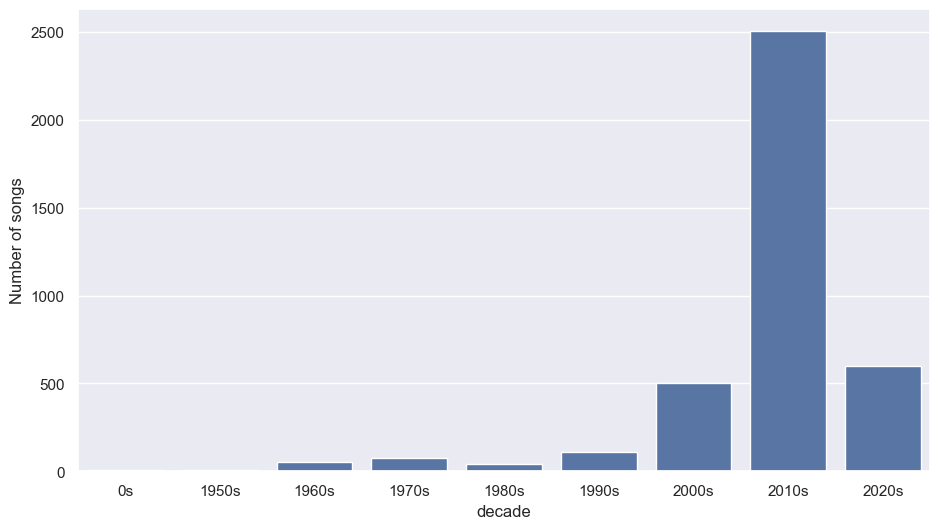

In [144]:
def get_decade(year):
    period_start = int(year / 10) * 10
    decade = '{}s'.format(period_start)
    return decade


decade_df = df.copy()

decade_df['decade'] = decade_df['release_year'].apply(get_decade)

decade_order = sorted(decade_df['decade'].unique())
decade_df['decade'] = pd.Categorical(decade_df['decade'], categories=decade_order, ordered=True)


sns.set(rc={'figure.figsize': (11, 6)})
sns.countplot(data=decade_df, x='decade')
plt.ylabel('Number of songs')

plt.show()

##3.2 - Distribution of Musical Features:

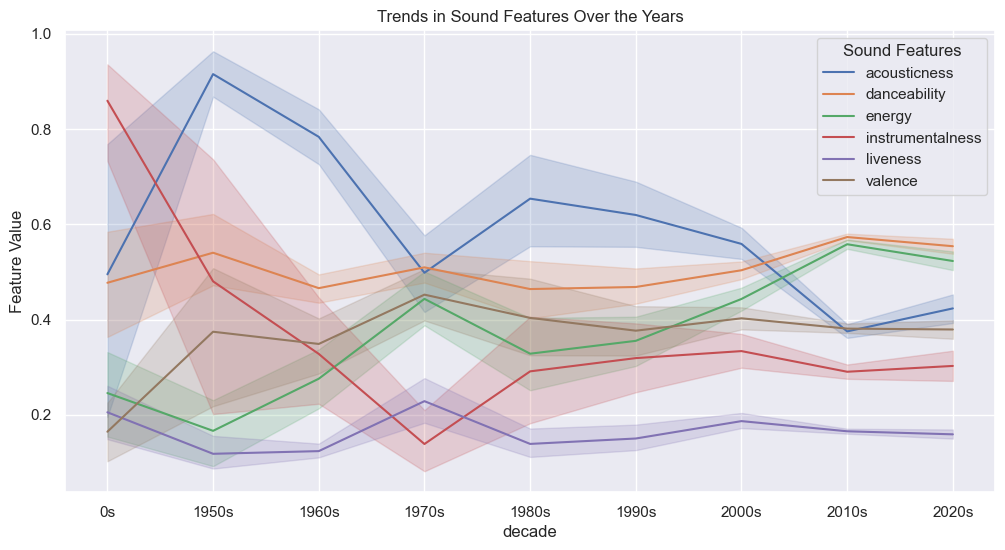

In [145]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

sns.set(rc={'figure.figsize': (12, 6)})
fig, ax = plt.subplots()

for feature in sound_features:
    sns.lineplot(data=decade_df, x='decade', y=feature, label=feature, ax=ax)

ax.set_title('Trends in Sound Features Over the Years')
ax.set_ylabel('Feature Value')
ax.legend(title='Sound Features')

##3.3 - Artist and Album Popularity:

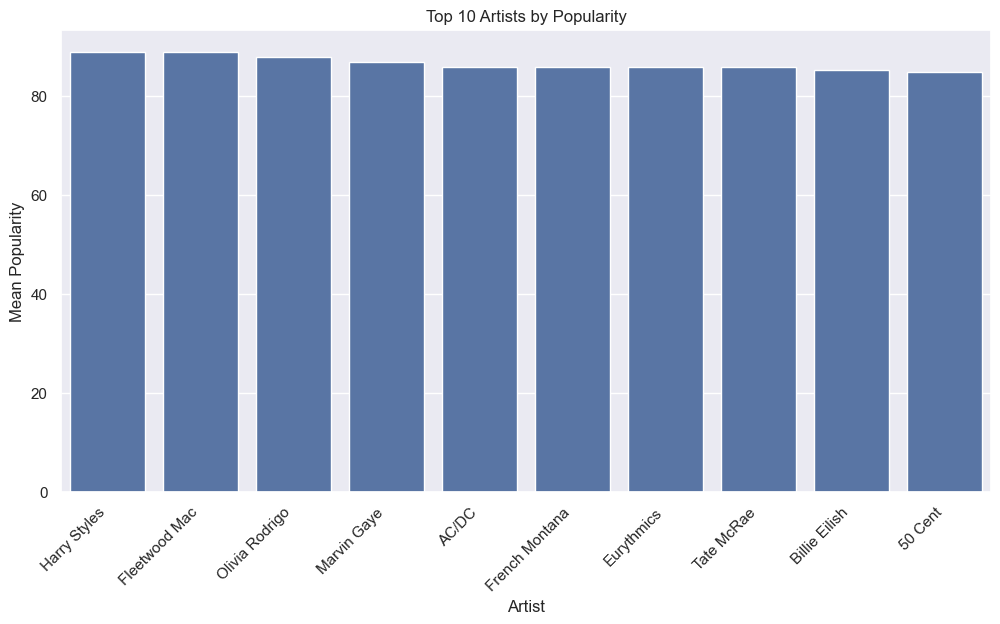

In [146]:
top_artists = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)

sns.set(rc={'figure.figsize': (12, 6)})
fig, ax = plt.subplots()

# Use barplot directly on the Axes object
sns.barplot(x=top_artists.index, y=top_artists.values, ax=ax)

ax.set_title('Top 10 Artists by Popularity')
ax.set_xlabel('Artist')
ax.set_ylabel('Mean Popularity')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

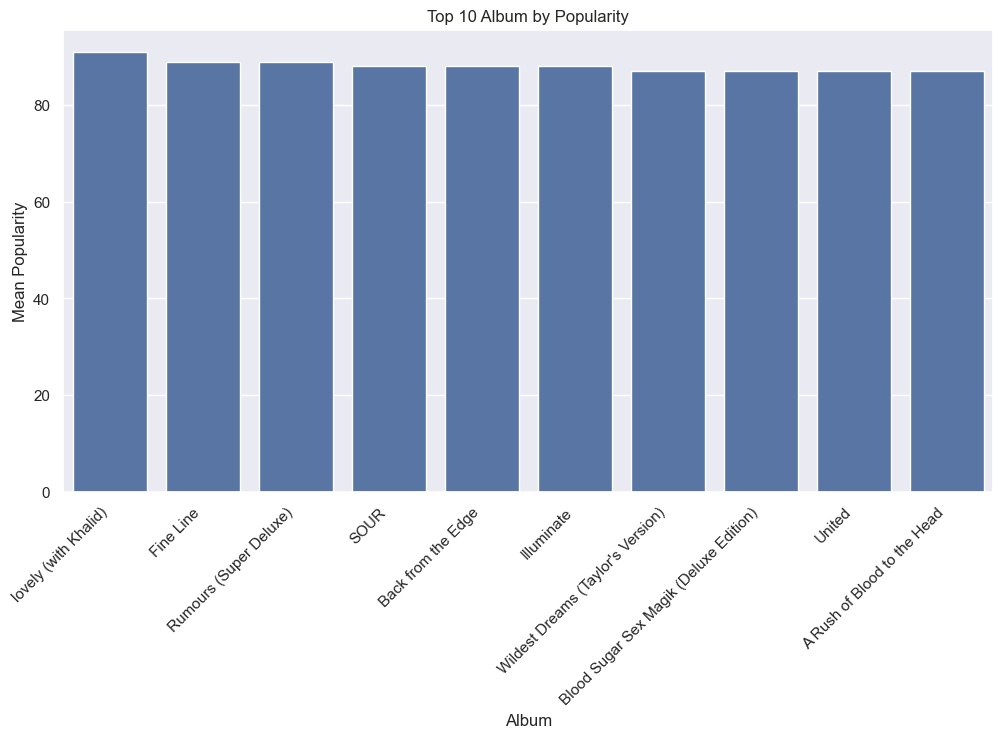

In [147]:
top_album = df.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)

sns.set(rc={'figure.figsize': (12, 6)})
fig, ax = plt.subplots()

# Use barplot directly on the Axes object
sns.barplot(x=top_album.index, y=top_album.values, ax=ax)

ax.set_title('Top 10 Album by Popularity')
ax.set_xlabel('Album')
ax.set_ylabel('Mean Popularity')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

##3.4 - User Analysis:

In [148]:
num_users = df['user'].nunique()
print(f"Number of unique users: {num_users}")

Number of unique users: 7


In [149]:
df['user'].unique()

array(['unknown', 'delta', 'gamma', 'alpha', 'dzeta', 'beta', 'epsilon'],
      dtype=object)

## 3.5- Song Durations:

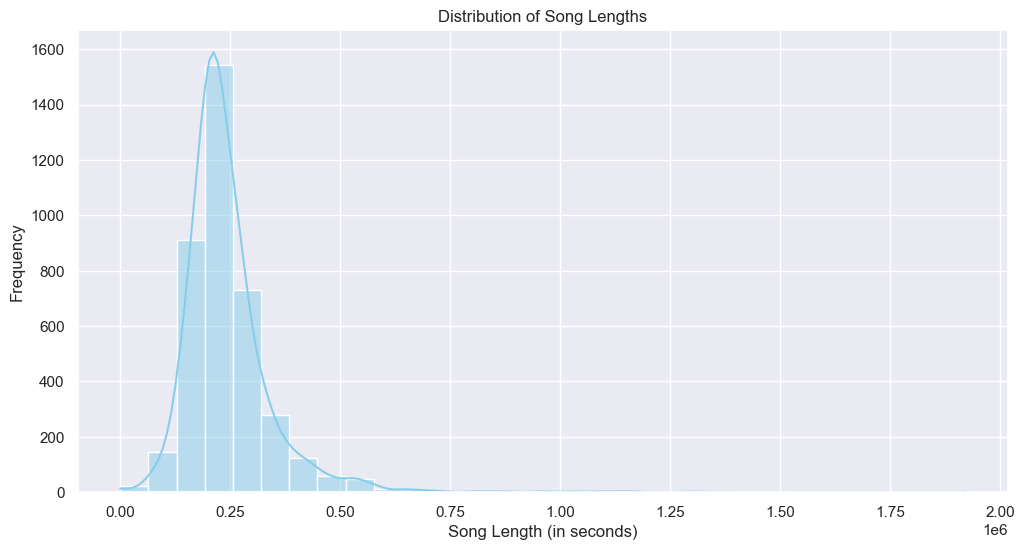

In [150]:
plt.figure(figsize=(12, 6))
sns.histplot(df['length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Song Lengths')
plt.xlabel('Song Length (in seconds)')
plt.ylabel('Frequency')

plt.show()

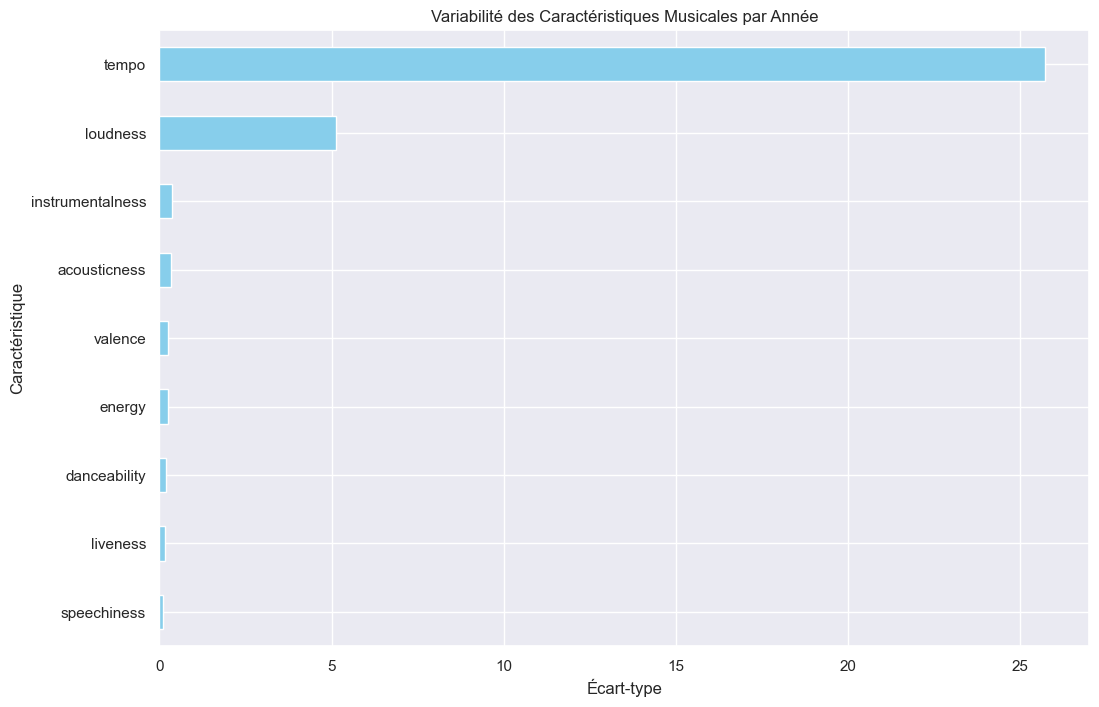

In [151]:

annees_a_analyser = [2010, 2015, 2020]  # Remplacez cela par les années que vous souhaitez analyser


features_to_analyze = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


selected_data = df[df['release_year'].isin(annees_a_analyser)][features_to_analyze]


variability = selected_data.std()

plt.figure(figsize=(12, 8))
variability.sort_values().plot(kind='barh', color='skyblue')
plt.title('Variabilité des Caractéristiques Musicales par Année')
plt.xlabel('Écart-type')
plt.ylabel('Caractéristique')
plt.show()


## 4 - Data Preprocessing ⚒️

## 4.1 - Handling Missing Data

In [152]:
df_unknown = df[(df['top_year']=='unknown')]

In [153]:
df_unknown.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,"Variations on a Polish Theme, Op. 10: No. 5 An...","Szymanowski: Piano Works, Vol. 2",Karol Szymanowski,06/12/1996,76933,53,0.996,0.329,0.00695,0.866,...,0.0448,70.295,0.2380,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,unknown,unknown
75,For J√≥hann,Bach Reworks (Pt. 1),V√≠kingur √ìlafsson,05/10/2018,183773,22,0.994,0.629,0.09140,0.947,...,0.0406,111.454,0.2410,4,0,0,spotify:track:5BzsTKLEKQMDhPwbCZOrn5,2018,unknown,unknown
80,"Concerto For Piano And Orchestra In G, Second ...",Gershwin's World,Herbie Hancock,01/01/1998,551666,20,0.981,0.208,0.09940,0.919,...,0.0342,62.543,0.0420,4,4,1,spotify:track:4rL06iWdtarlSqlxgU2N14,1998,unknown,unknown
92,This Reminds You - Satie Remix,Shadows,Remy Van Kesteren,15/02/2019,321146,26,0.870,0.258,0.05890,0.898,...,0.0381,98.874,0.0378,4,5,0,spotify:track:3rruI72VDoIINSuAhryTOL,2019,unknown,unknown
150,Sull Lull,Madar,Jan Garbarek,1992,1009706,27,0.913,0.502,0.30400,0.857,...,0.0473,105.740,0.5590,4,7,0,spotify:track:3DzBR3hE8hzutFqlB1jjmk,1992,unknown,unknown


In [154]:

df_unknown['user_year'] = df_unknown['user'] + '_' + df_unknown['top_year'].astype(str)


df_unknown[['user', 'top_year', 'user_year']].head()

,user,top_year,user_year
0,unknown,unknown,unknown_unknown
75,unknown,unknown,unknown_unknown
80,unknown,unknown,unknown_unknown
92,unknown,unknown,unknown_unknown
150,unknown,unknown,unknown_unknown


In [155]:
# Extraction des colonnes catégoriques
categorical_columns = ['name', 'album', 'artist', 'uri','top_year','user_year']

label_encoder = LabelEncoder()

for column in categorical_columns:
    df_unknown[column] = label_encoder.fit_transform(df_unknown[column])

In [156]:
df_unknown[['user', 'top_year', 'user_year']].head()

,user,top_year,user_year
0,unknown,0,0
75,unknown,0,0
80,unknown,0,0
92,unknown,0,0
150,unknown,0,0


In [157]:
df_unknown = df_unknown.drop(['release_date','user'],axis=1)

In [158]:
df_unknown['user_year'].unique()

array([0])

In [159]:
df = df[df['top_year'] != 'unknown']


In [160]:
# checking for missing values in data
df.isna().sum()

name                9
album               9
artist              0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
key                 0
mode                0
uri                 0
release_year        0
top_year            0
user                0
dtype: int64

2 columns with 9 missings values:
1.   name
1.   album










In [161]:
df = df.dropna()


In [162]:
# checking for missing values in data
df.isna().sum()

name                0
album               0
artist              0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
key                 0
mode                0
uri                 0
release_year        0
top_year            0
user                0
dtype: int64

## 4.3- Handling Outliers

In [163]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Detect outliers in numerical features
outliers_indices = detect_outliers(df, features=numerical_features, n=1.5)
number_of_outliers = len(outliers_indices)

# Print the number of outliers
print(f'Number of outliers: {number_of_outliers}')

Number of outliers: 481


In [164]:
 #Removing all Outliers
df = df.drop(outliers_indices)

In [165]:
print(f"Dataset Shape After Removing Outliers {df.shape}")

Dataset Shape After Removing Outliers (3309, 22)


## 4.5- Data Split to Train and Test Sets

In [166]:
# Créer la colonne user_year en concaténant user et release_year
df['user_year'] = df['user'] + '_' + df['top_year'].astype(str)

# Afficher les premières lignes du DataFrame avec la nouvelle colonne
print(df[['user', 'top_year', 'user_year']].head())

    user top_year   user_year
1  delta     2022  delta_2022
2  gamma     2020  gamma_2020
3  gamma     2018  gamma_2018
4  alpha     2020  alpha_2020
5  delta     2018  delta_2018


In [167]:
# Extraction des colonnes catégoriques
categorical_columns = ['name', 'album', 'artist', 'uri','top_year','user_year']

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3309 entries, 1 to 3897
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3309 non-null   int32  
 1   album             3309 non-null   int32  
 2   artist            3309 non-null   int32  
 3   release_date      3309 non-null   object 
 4   length            3309 non-null   int64  
 5   popularity        3309 non-null   int64  
 6   acousticness      3309 non-null   float64
 7   danceability      3309 non-null   float64
 8   energy            3309 non-null   float64
 9   instrumentalness  3309 non-null   float64
 10  liveness          3309 non-null   float64
 11  loudness          3309 non-null   float64
 12  speechiness       3309 non-null   float64
 13  tempo             3309 non-null   float64
 14  valence           3309 non-null   float64
 15  time_signature    3309 non-null   int64  
 16  key               3309 non-null   int64  
 17  

In [169]:
# First we extract the x Featues and y Label
x= df.drop(['user','release_date'], axis=1)


y = df['user_year']

In [170]:
x.shape, y.shape

((3309, 21), (3309,))

In [171]:
# Then we Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    shuffle = True,
                                                    )


print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2647 samples.
Testing set has 662 samples.


## 4.6- Handling Imbalanced Data

In [172]:
y_train.value_counts()

user_year
22    80
6     79
13    79
34    78
0     77
3     76
29    76
2     76
8     75
30    75
10    75
26    74
5     73
1     73
21    72
14    72
36    72
9     72
37    71
20    71
32    70
12    70
28    70
7     69
23    69
31    68
25    67
15    67
24    67
35    66
19    64
27    63
33    61
16    60
18    58
4     58
17    57
11    47
Name: count, dtype: int64

In [173]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [174]:
y_train.value_counts()

user_year
23    80
3     80
0     80
2     80
25    80
12    80
29    80
26    80
15    80
21    80
9     80
8     80
32    80
19    80
16    80
11    80
24    80
37    80
17    80
22    80
28    80
36    80
35    80
27    80
20    80
10    80
31    80
18    80
1     80
5     80
34    80
33    80
13    80
4     80
6     80
7     80
14    80
30    80
Name: count, dtype: int64

In [175]:
len(y_train.unique())

38

## 4.7- Feature Scaling

In [176]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the StandardScaler on the training data
scaler.fit(X_train[numerical_features])

# Transforming (standardize) the continuous features in the training and testing data
X_train_cont_scaled = scaler.transform(X_train[numerical_features])
X_test_cont_scaled = scaler.transform(X_test[numerical_features])

# Replacing the scaled continuous features in the original data
X_train[numerical_features] = X_train_cont_scaled
X_test[numerical_features] = X_test_cont_scaled

X_train

,name,album,artist,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user_year
0,2399,378,710,0.739480,-0.403940,-1.144107,-2.173568,1.188590,1.434284,-0.383514,...,-0.076082,0.914903,-1.059760,0.234550,1.654197,1.13617,1416,0.251835,6,23
1,238,655,437,-0.336294,1.578365,1.122978,-0.498298,-0.682752,-0.743347,-0.356879,...,-0.472872,-1.489289,0.100291,0.234550,-0.374580,-0.88015,1574,0.374938,2,9
2,640,322,648,-1.054874,0.931082,0.322441,1.268842,0.560759,-0.739700,-0.223705,...,1.339390,-1.274063,0.531282,0.234550,-0.374580,1.13617,905,0.744246,4,35
3,2549,309,1210,-0.183123,-1.293954,-0.123572,0.215043,0.009888,1.538874,-0.799906,...,-0.338065,-1.384422,0.531282,0.234550,1.074546,-0.88015,144,0.374938,3,27
4,1645,1559,747,-0.236675,0.121978,1.403165,0.409591,-1.803532,-0.743221,-0.303609,...,-0.413099,0.485897,0.833378,0.234550,0.494896,1.13617,1479,-2.825739,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,1443,738,926,-0.293584,0.121978,0.234840,0.725245,1.073186,-0.743318,-0.296714,...,2.804280,-0.305334,1.606391,0.234550,-0.954231,-0.88015,2169,0.005629,6,37
3036,2124,28,830,-0.138582,1.133358,-0.325680,1.324846,-0.641004,-0.743347,-0.109716,...,0.827585,0.188489,1.139037,-2.456142,-1.533882,-0.88015,610,0.498041,6,37
3037,1212,368,844,0.100932,1.376089,-0.068367,1.420959,-0.036606,-0.690329,-0.426570,...,3.947078,0.176751,1.747870,0.234550,0.205070,-0.88015,350,0.744246,6,37
3038,733,1591,755,1.298249,1.052447,0.930035,0.428520,-0.871510,-0.743334,-0.102448,...,0.249791,-1.040179,-0.476641,0.234550,0.494896,-0.88015,2353,0.498041,6,37


## 5- Models Training and Evaluation ⚙️

In [177]:
# List of classifiers to evaluate
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter= 1500,  n_jobs=-1, C=0.1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42,max_depth=5, criterion='entropy')),
    ("Random Forest",RandomForestClassifier(
    max_depth=None,min_samples_split=5,n_estimators=389,random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42,
                                                    n_estimators=100, learning_rate=0.1, max_depth=3)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, verbose=-1, learning_rate=0.1, num_leaves=31, max_depth=-1, n_estimators=100)),
    ('k-nearest neighbors', KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        metric='minkowski',
    ))
]

In [178]:
# Initialize RFE feature selector
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=8)

# Creating lists for classifier names, mean_test_accuracy_scores, and results.
results = []
mean_test_accuracy_scores = []
classifier_names = []

for model_name, model in classifiers:
    # Print model name
    print(f"For {model_name}:")

    # Steps Creation
    steps = list()

    steps.append(('feature_selector', RFE_selector))  # RFE feature selection

    steps.append((model_name, model))

    # Create the pipeline
    pipeline = Pipeline(steps=steps)

    # 5-fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation with train scores
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy',n_jobs=-1, return_train_score=True)

    print(f"Cross-validation completed successfully for {model_name}")
    print('*' * 50)

    # Append results to the list
    results.append({
        "Model Name": model_name,
        "Mean Train Accuracy": np.mean(cv_results['train_score']),
        "Mean Test Accuracy": np.mean(cv_results['test_score'])
    })

    mean_test_accuracy_scores.append(np.mean(cv_results['test_score']))
    classifier_names.append(model_name)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)

For Logistic Regression:


Cross-validation completed successfully for Logistic Regression
**************************************************
For Decision Tree:
Cross-validation completed successfully for Decision Tree
**************************************************
For Random Forest:
Cross-validation completed successfully for Random Forest
**************************************************
For Gradient Boosting:
Cross-validation completed successfully for Gradient Boosting
**************************************************
For LightGBM:
Cross-validation completed successfully for LightGBM
**************************************************
For k-nearest neighbors:
Cross-validation completed successfully for k-nearest neighbors
**************************************************


,Model Name,Mean Train Accuracy,Mean Test Accuracy
0,Logistic Regression,0.517928,0.480263
1,Decision Tree,0.842105,0.842105
2,Random Forest,1.000000,0.982895
3,Gradient Boosting,1.000000,1.000000
4,LightGBM,1.000000,1.000000
5,k-nearest neighbors,0.471382,0.254605


In [179]:
# Creating a DataFrame from the data
data = pd.DataFrame({'Classifier': classifier_names, 'Test Accuracy': mean_test_accuracy_scores})

# Creating Plotly bar chart
fig = px.bar(data, x='Test Accuracy', y='Classifier', orientation='h', color='Test Accuracy',
             title='Mean Test Accuracy Scores by Classifiers', text='Test Accuracy', color_continuous_scale='viridis')

# Customizing the layout
fig.update_layout(
    xaxis_title='Test Accuracy',
    yaxis_title='Classifier',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False,
    height=500,
    width=900
)

fig.show()

## Selected features

In [180]:
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=21)

RFE_selector.fit(X_train, y_train)

selected_feature_indices = np.where(RFE_selector.support_)[0]

selected_feature_names = X_train.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['name', 'album', 'artist', 'length', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'time_signature', 'key', 'mode',
       'uri', 'release_year', 'top_year', 'user_year'],
      dtype='object')


## Random Forest

In [181]:
rf = RandomForestClassifier(
    max_depth=None,
    min_samples_split=5,
    n_estimators=389,
    random_state=42
)

pipeline = Pipeline([
    ('feature_selector', RFE_selector),
    ('classifier', rf)
])



pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


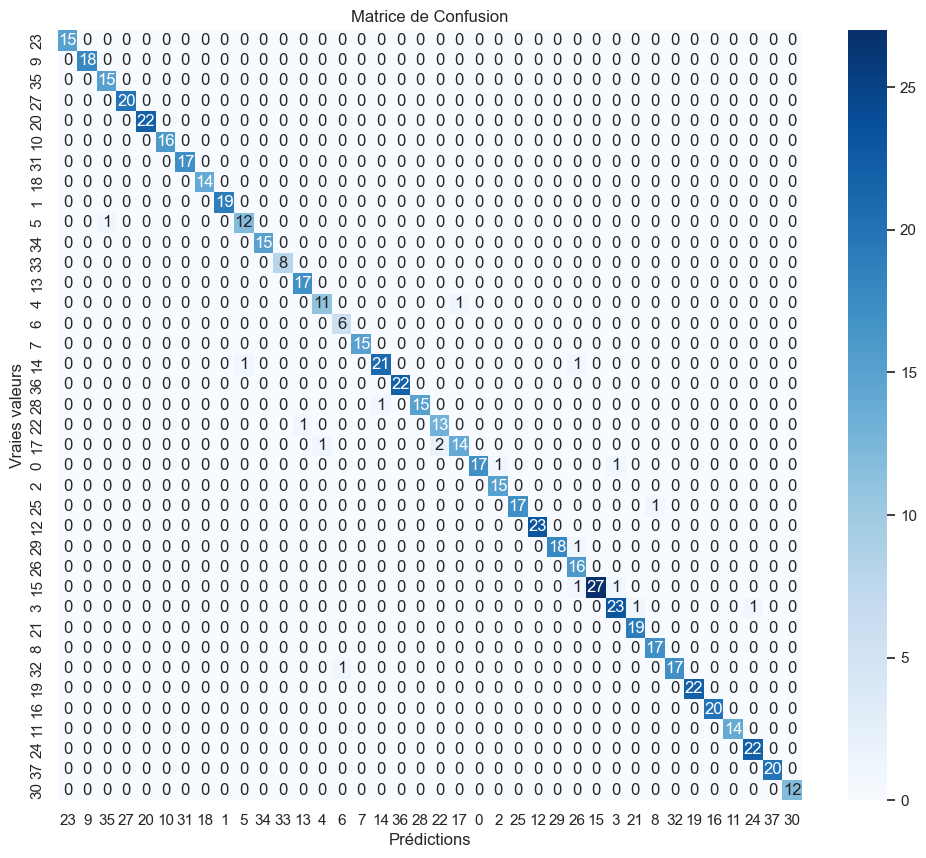

In [182]:

cm = confusion_matrix(y_test, y_pred)


unique_labels = y_train.unique()


cm_df = pd.DataFrame(cm, index=unique_labels, columns=unique_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

In [183]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        19
           9       0.92      0.92      0.92        13
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         8
          12       0.94      1.00      0.97        17
          13       0.92      0.92      0.92        12
          14       0.86      1.00      0.92         6
          15       1.00      1.00      1.00        15
          16       0.95      0.91      0.93        23
          17       1.00    

## LightGBM

In [184]:
params = {'random_state': 42, 
              'num_leaves': 100, 
              'n_estimators': 200, 
              'learning_rate': 0.1, 
              'feature_fraction': 1.0, 
              'bagging_freq': 5, 
              'bagging_fraction': 1.0,
              'boosting_type': 'gbdt',
              'n_estimators': 389,
              'verbose': -1
}

lgb_model = lgb.LGBMClassifier(**params)


lgb_model.fit(X_train, y_train)


y_pred = lgb_model.predict(X_test)


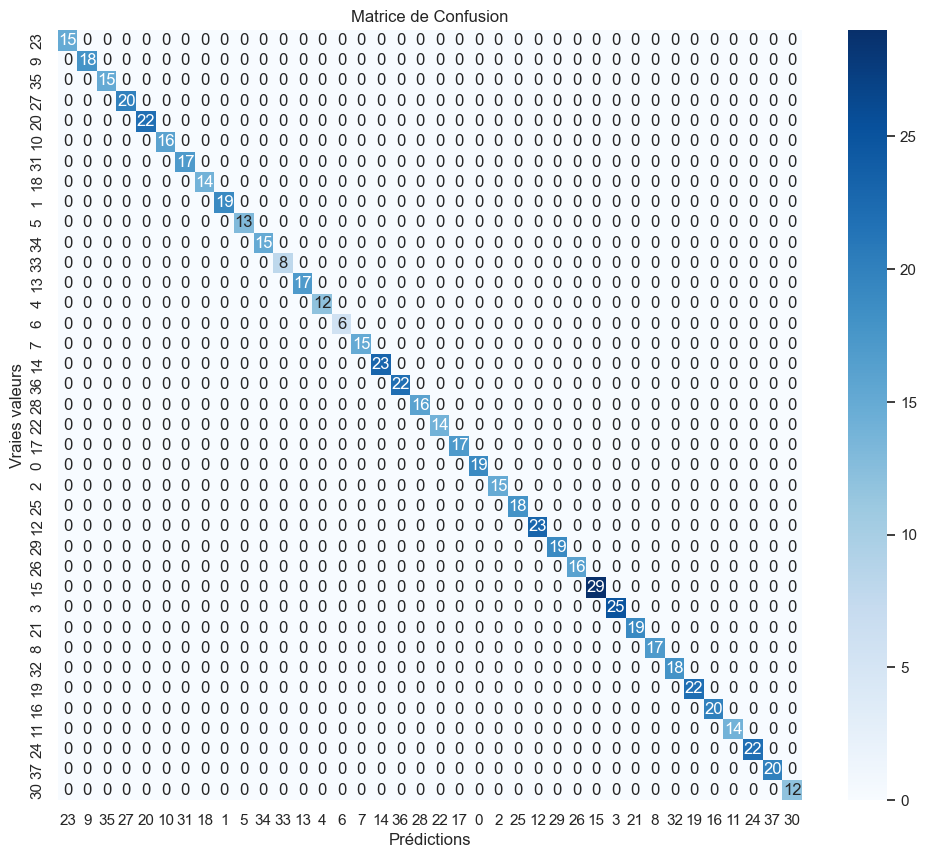

In [185]:

cm = confusion_matrix(y_test, y_pred)


unique_labels = y_train.unique()

cm_df = pd.DataFrame(cm, index=unique_labels, columns=unique_labels)


plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00        23
          17       1.00    

## Predict the unknow values from the df_unknown